# [TALLER 05] GAUSS-JACOBI & GAUSS-SEIDEL

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%autoreload 2
from src import gauss_jacobi, gauss_seidel

UsageError: Line magic function `%autoreload` not found.


## EJERCICIO UNO
Resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{aligned}
2x_1 + 10x_2 &= 16, \\
3x_1 + 2x_2 &= 11 \\
\end{aligned}
$$

Primero generamos la matriz ampliada del sistema de ecuaciones, donde:

$$
\begin{bmatrix}
2 & 10 & 16 \\
3 & 2 & 11 \\
\end{bmatrix}
$$

### MÉTODO DE GAUSS-JACOBI con X0=(1,1)

In [216]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x = gauss_jacobi(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

[01-25 09:03:17][INFO] i= 0 x: [[1. 1.]]
[01-25 09:03:17][INFO] i= 1 x: [[3.  1.4]]
[01-25 09:03:17][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-25 09:03:17][INFO] i= 3 x: [[3.         1.05333333]]
[01-25 09:03:17][INFO] i= 4 x: [[2.96444444 1.        ]]
[01-25 09:03:17][INFO] i= 5 x: [[3.         1.00711111]]
[01-25 09:03:17][INFO] i= 6 x: [[2.99525926 1.        ]]
[01-25 09:03:17][INFO] i= 7 x: [[3.         1.00094815]]
[01-25 09:03:17][INFO] i= 8 x: [[2.9993679 1.       ]]
[01-25 09:03:17][INFO] i= 9 x: [[3.         1.00012642]]
[01-25 09:03:17][INFO] i= 10 x: [[2.99991572 1.        ]]
[01-25 09:03:17][INFO] i= 11 x: [[3.         1.00001686]]
[01-25 09:03:17][INFO] i= 12 x: [[2.99998876 1.        ]]
[01-25 09:03:17][INFO] i= 13 x: [[3.         1.00000225]]
[01-25 09:03:17][INFO] i= 14 x: [[2.9999985 1.       ]]
[01-25 09:03:17][INFO] i= 15 x: [[3.        1.0000003]]
[01-25 09:03:17][INFO] i= 16 x: [[2.9999998 1.       ]]
[01-25 09:03:17][INFO] i= 17 x: [[3.         1.00000004]]
[01-

### MÉTODO DE GAUSS-SEIDEL X0=(1,1)

In [ ]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x = gauss_seidel(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

[01-25 09:03:17][INFO] i= 0 x: [[1. 1.]]
[01-25 09:03:17][INFO] i= 1 x: [[3. 1.]]


## GRAFICA con X0=(1,1)

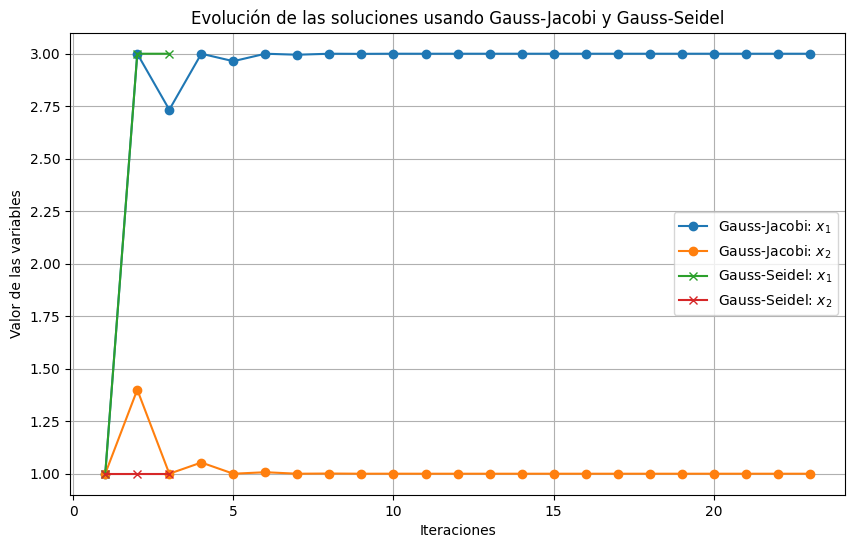

Solución final con Gauss-Jacobi: [3. 1.]
Solución final con Gauss-Seidel: [3. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el método de Gauss-Jacobi
def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.array(x0, dtype=float)
    tray = [x.copy()]
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - suma) / A[i, i]
        
        tray.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new

    return np.array(tray)

# Definir el método de Gauss-Seidel
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.array(x0, dtype=float)
    tray = [x.copy()]
    
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i, j] * x_new[j] for j in range(i)) + sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma) / A[i, i]
        
        tray.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new

    return np.array(tray)

# Definir la matriz A, el vector b y las condiciones iniciales
A = np.array([[3, 2], [2, 10]], dtype=float)
b = np.array([11, 16], dtype=float)
x0 = np.zeros(len(b))  # Aproximación inicial
max_iter = 100  # Número máximo de iteraciones
tol = 10e-10  # Tolerancia

# Usar el método de Gauss-Jacobi
tray_jacobi = gauss_jacobi(A=A, b=b, x0=(1, 1), tol=tol, max_iter=max_iter)

# Usar el método de Gauss-Seidel
tray_seidel = gauss_seidel(A=A, b=b, x0=(1, 1), tol=tol, max_iter=max_iter)

# Graficar la evolución de las soluciones
plt.figure(figsize=(10, 6))

# Graficar Gauss-Jacobi
plt.plot(range(1, len(tray_jacobi) + 1), tray_jacobi[:, 0], label="Gauss-Jacobi: $x_1$", marker='o')
plt.plot(range(1, len(tray_jacobi) + 1), tray_jacobi[:, 1], label="Gauss-Jacobi: $x_2$", marker='o')

# Graficar Gauss-Seidel
plt.plot(range(1, len(tray_seidel) + 1), tray_seidel[:, 0], label="Gauss-Seidel: $x_1$", marker='x')
plt.plot(range(1, len(tray_seidel) + 1), tray_seidel[:, 1], label="Gauss-Seidel: $x_2$", marker='x')

# Configuración de la gráfica
plt.title("Evolución de las soluciones usando Gauss-Jacobi y Gauss-Seidel")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de las variables")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar la última solución de ambos métodos
print("Solución final con Gauss-Jacobi:", tray_jacobi[-1])
print("Solución final con Gauss-Seidel:", tray_seidel[-1])



### MÉTODO DE GAUSS-JACOBI con X0=(5,-2)

In [12]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x = gauss_jacobi(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

NameError: name 'gauss_jacobi' is not defined

### MÉTODO DE GAUSS-SEIDEL X0=(5,-2)

In [186]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x = gauss_seidel(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

[01-25 09:01:38][INFO] i= 0 x: [[ 5. -2.]]
[01-25 09:01:38][INFO] i= 1 x: [[5.  0.6]]
[01-25 09:01:38][INFO] i= 2 x: [[3.26666667 0.94666667]]
[01-25 09:01:38][INFO] i= 3 x: [[3.03555556 0.99288889]]
[01-25 09:01:38][INFO] i= 4 x: [[3.00474074 0.99905185]]
[01-25 09:01:38][INFO] i= 5 x: [[3.0006321  0.99987358]]
[01-25 09:01:38][INFO] i= 6 x: [[3.00008428 0.99998314]]
[01-25 09:01:38][INFO] i= 7 x: [[3.00001124 0.99999775]]
[01-25 09:01:38][INFO] i= 8 x: [[3.0000015 0.9999997]]
[01-25 09:01:38][INFO] i= 9 x: [[3.0000002  0.99999996]]
[01-25 09:01:38][INFO] i= 10 x: [[3.00000003 0.99999999]]
[01-25 09:01:38][INFO] i= 11 x: [[3. 1.]]
[01-25 09:01:38][INFO] i= 12 x: [[3. 1.]]


### GRAFICA con X0=(5,-2)

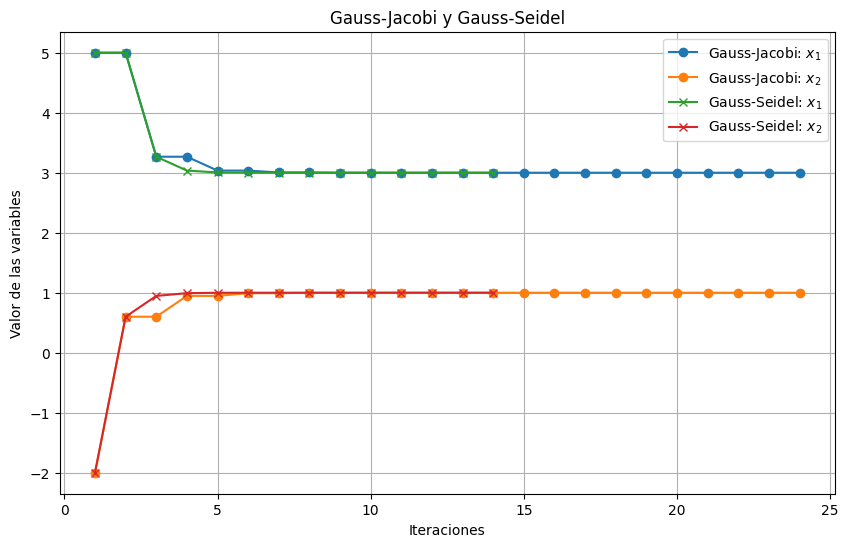

Solución final con Gauss-Jacobi: [3. 1.]
Solución final con Gauss-Seidel: [3. 1.]


In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el método de Gauss-Jacobi
def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.array(x0, dtype=float)
    tray = [x.copy()]
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - suma) / A[i, i]
        
        tray.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new

    return np.array(tray)

# Definir el método de Gauss-Seidel
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.array(x0, dtype=float)
    tray = [x.copy()]
    
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i, j] * x_new[j] for j in range(i)) + sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma) / A[i, i]
        
        tray.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new

    return np.array(tray)

# Definir la matriz A, el vector b y las condiciones iniciales
A = np.array([[3, 2], [2, 10]], dtype=float)
b = np.array([11, 16], dtype=float)
x0 = np.zeros(len(b))  # Aproximación inicial
max_iter = 100  # Número máximo de iteraciones
tol = 10e-10  # Tolerancia

# Usar el método de Gauss-Jacobi
tray_jacobi = gauss_jacobi(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

# Usar el método de Gauss-Seidel
tray_seidel = gauss_seidel(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

# Graficar la evolución de las soluciones
plt.figure(figsize=(10, 6))

# Graficar Gauss-Jacobi
plt.plot(range(1, len(tray_jacobi) + 1), tray_jacobi[:, 0], label="Gauss-Jacobi: $x_1$", marker='o')
plt.plot(range(1, len(tray_jacobi) + 1), tray_jacobi[:, 1], label="Gauss-Jacobi: $x_2$", marker='o')

# Graficar Gauss-Seidel
plt.plot(range(1, len(tray_seidel) + 1), tray_seidel[:, 0], label="Gauss-Seidel: $x_1$", marker='x')
plt.plot(range(1, len(tray_seidel) + 1), tray_seidel[:, 1], label="Gauss-Seidel: $x_2$", marker='x')

# Configuración de la gráfica
plt.title("Gauss-Jacobi y Gauss-Seidel")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de las variables")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar la última solución de ambos métodos
print("Solución final con Gauss-Jacobi:", tray_jacobi[-1])
print("Solución final con Gauss-Seidel:", tray_seidel[-1])


## SIN CONVERGENCIA
### METODO DE GAUSS-JACOBI con X0=(1,1)

In [214]:
A = [[2,10],[3,2]]
b = np.array([16,11],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x = gauss_jacobi(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

TypeError: list indices must be integers or slices, not tuple

### METODO DE GAUSS-SEIDEL con X0=(1,1)

In [ ]:
A = [[2,10],[3,2]]
b = np.array([16,11],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x = gauss_seidel(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

TypeError: list indices must be integers or slices, not tuple

### GRAFICAR sin CONVERGENCIA

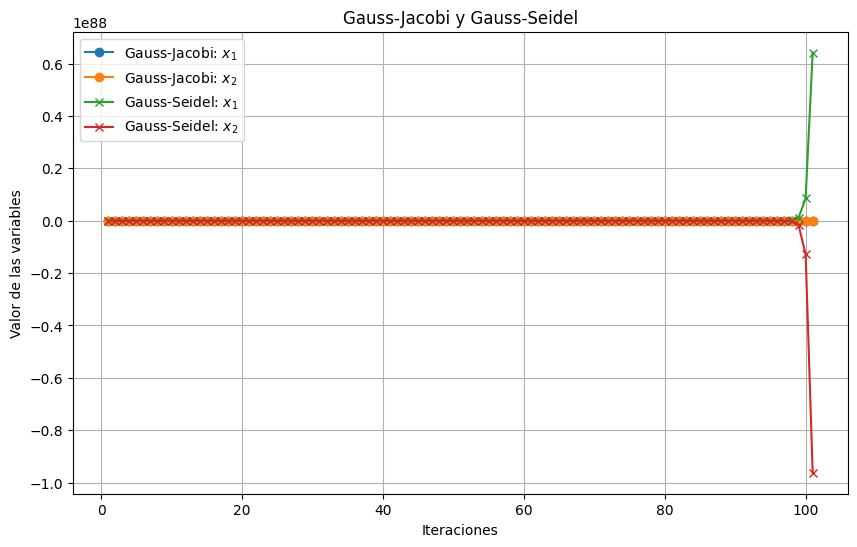

Solución final con Gauss-Jacobi: [ 1.13264331e+44 -1.69896497e+44]
Solución final con Gauss-Seidel: [ 6.41440437e+87 -9.62160656e+87]


In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el método de Gauss-Jacobi
def gauss_jacobi(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.array(x0, dtype=float)
    tray = [x.copy()]
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if i != j)
            x_new[i] = (b[i] - suma) / A[i, i]
        
        tray.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new

    return np.array(tray)

# Definir el método de Gauss-Seidel
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = np.array(x0, dtype=float)
    tray = [x.copy()]
    
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i, j] * x_new[j] for j in range(i)) + sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma) / A[i, i]
        
        tray.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new

    return np.array(tray)

# Definir la matriz A, el vector b y las condiciones iniciales
A = np.array([[2, 10],[3, 2]], dtype=float)
b = np.array([16,11], dtype=float)
x0 = np.zeros(len(b))  # Aproximación inicial
max_iter = 100  # Número máximo de iteraciones
tol = 10e-10  # Tolerancia

# Usar el método de Gauss-Jacobi
tray_jacobi = gauss_jacobi(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

# Usar el método de Gauss-Seidel
tray_seidel = gauss_seidel(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

# Graficar la evolución de las soluciones
plt.figure(figsize=(10, 6))

# Graficar Gauss-Jacobi
plt.plot(range(1, len(tray_jacobi) + 1), tray_jacobi[:, 0], label="Gauss-Jacobi: $x_1$", marker='o')
plt.plot(range(1, len(tray_jacobi) + 1), tray_jacobi[:, 1], label="Gauss-Jacobi: $x_2$", marker='o')

# Graficar Gauss-Seidel
plt.plot(range(1, len(tray_seidel) + 1), tray_seidel[:, 0], label="Gauss-Seidel: $x_1$", marker='x')
plt.plot(range(1, len(tray_seidel) + 1), tray_seidel[:, 1], label="Gauss-Seidel: $x_2$", marker='x')

# Configuración de la gráfica
plt.title("Gauss-Jacobi y Gauss-Seidel")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de las variables")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar la última solución de ambos métodos
print("Solución final con Gauss-Jacobi:", tray_jacobi[-1])
print("Solución final con Gauss-Seidel:", tray_seidel[-1])
